# Exploratory Data Analysis (EDA)
This phase involves exploring the cleaned dataset to uncover relationships between demographic variables and income level.

## 1. Load Data
Here we do load our imports, read the cleaned csv, and print the first 5 rows to ensure the data was loaded properly.

In [10]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import List

# Set visual style
sns.set(style='whitegrid')

# Load the cleaned dataset
df = pd.read_csv('adult_clean.csv')  # Replace with the actual cleaned file path
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


## 2. Basic Data Summary
Here we display info about the columns and summary statistics about the overall data. 

The `info()` function for pandas dataframes gives info about the columns including the column index, column names, non null counts, and data type of the column. 

The `describe()` function for pandas dataframes gives summary statistics for the overall table as well as the individual columns. 

In [11]:
# Dataset information
df.info()

# Descriptive statistics
df.describe(include='all')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30162 entries, 0 to 30161
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             30162 non-null  int64 
 1   workclass       30162 non-null  object
 2   fnlwgt          30162 non-null  int64 
 3   education       30162 non-null  object
 4   education_num   30162 non-null  int64 
 5   marital_status  30162 non-null  object
 6   occupation      30162 non-null  object
 7   relationship    30162 non-null  object
 8   race            30162 non-null  object
 9   sex             30162 non-null  object
 10  capital_gain    30162 non-null  int64 
 11  capital_loss    30162 non-null  int64 
 12  hours_per_week  30162 non-null  int64 
 13  native_country  30162 non-null  object
 14  income          30162 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.5+ MB


,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
count,30162.000000,30162,3.016200e+04,30162,30162.000000,30162,30162,30162,30162,30162,30162.000000,30162.000000,30162.000000,30162,30162
unique,NaN,7,NaN,16,NaN,7,14,6,5,2,NaN,NaN,NaN,41,2
top,NaN,Private,NaN,HS-grad,NaN,Married-civ-spouse,Prof-specialty,Husband,White,Male,NaN,NaN,NaN,United-States,<=50K
freq,NaN,22286,NaN,9840,NaN,14065,4038,12463,25933,20380,NaN,NaN,NaN,27504,22654
mean,38.437902,NaN,1.897938e+05,NaN,10.121312,NaN,NaN,NaN,NaN,NaN,1092.007858,88.372489,40.931238,NaN,NaN
std,13.134665,NaN,1.056530e+05,NaN,2.549995,NaN,NaN,NaN,NaN,NaN,7406.346497,404.298370,11.979984,NaN,NaN
min,17.000000,NaN,1.376900e+04,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,NaN,NaN
25%,28.000000,NaN,1.176272e+05,NaN,9.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
50%,37.000000,NaN,1.784250e+05,NaN,10.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,40.000000,NaN,NaN
75%,47.000000,NaN,2.376285e+05,NaN,13.000000,NaN,NaN,NaN,NaN,NaN,0.000000,0.000000,45.000000,NaN,NaN


## 3. Income Distribution
Here we use a pie chart to display the proportions of income distributions in the dataset. Custom string formatting function implemented to show both the counts and percentages of each category.

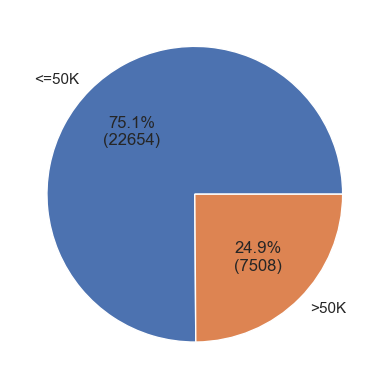

In [12]:
# Step 1: Get frequency counts of each unique value in the 'income' column
s = df['income'].value_counts()

# returns a function for formatting the pie chart strings
def count_percentage_formatter(values: List[int]):
    """
    Returns a formatting function for displaying both percentage and raw count
    on a pie chart.
    """
    def formatter(pct: float) -> str:
        total = sum(values)  # total count of all items
        absolute = int(round(pct * total / 100.0))  # convert percentage back to count
        return '{:.1f}%\n({:d})'.format(pct, absolute)  # format: "25.0%\n(50)"

    return formatter


plt.pie(s,labels = s.index, autopct=count_percentage_formatter(s))
plt.show()

## 4. Age vs Income

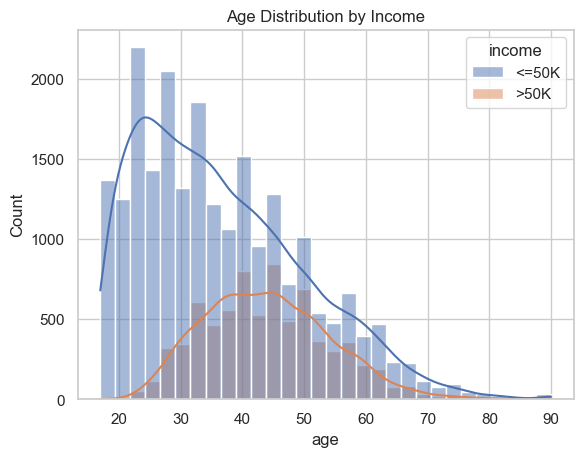

In [13]:
sns.histplot(data=df, x='age', hue='income', bins=30, kde=True)
plt.title('Age Distribution by Income')
plt.show()

## 5. Education vs Income
To simplify the analysis and improve interpretability, we grouped the original 16 distinct education levels into four broader categories: Less than HS, High School Grad, Some College/Associate, and Bachelor’s or Higher. This consolidation makes it easier to compare meaningful trends without being overwhelmed by granular variations.

We then plotted the percentage distribution of income (<=50K vs >50K) within each group, rather than raw counts. This approach allows for a fair comparison across education levels of different sizes and clearly highlights the relationship between higher education attainment and higher income likelihood.

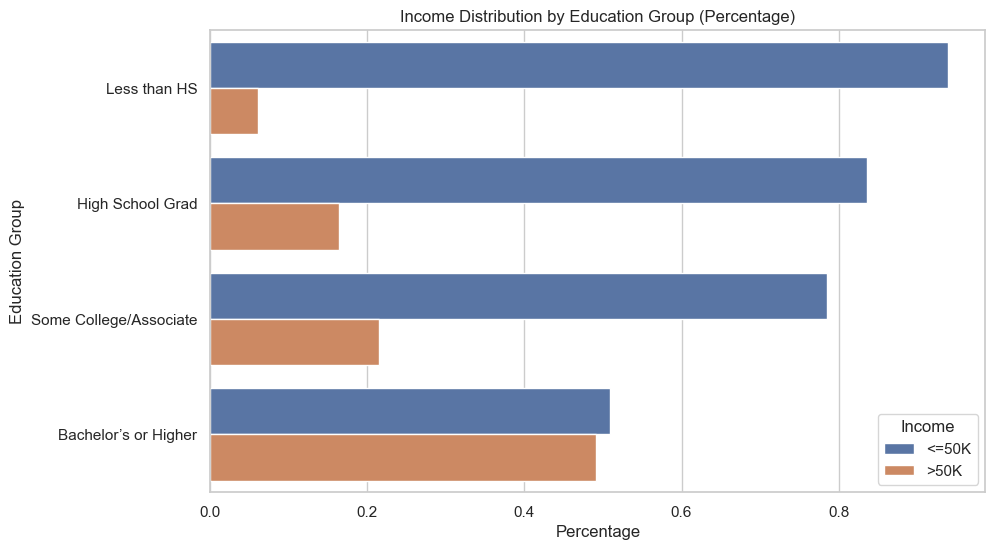

Distinct education levels: ['Bachelors' 'HS-grad' '11th' 'Masters' '9th' 'Some-college' 'Assoc-acdm'
 '7th-8th' 'Doctorate' 'Assoc-voc' 'Prof-school' '5th-6th' '10th'
 'Preschool' '12th' '1st-4th']


In [14]:
# Define grouped education levels
def group_education(level):
    if level in ['Preschool', '1st-4th', '5th-6th', '7th-8th', '9th', '10th', '11th', '12th']:
        return 'Less than HS'
    elif level == 'HS-grad':
        return 'High School Grad'
    elif level in ['Some-college', 'Assoc-acdm', 'Assoc-voc']:
        return 'Some College/Associate'
    else:
        return 'Bachelor’s or Higher'

# Apply new grouped column
df['education_grouped'] = df['education'].apply(group_education)


edu_income_pct = (
    df.groupby('education_grouped')['income']
    .value_counts(normalize=True)
    .rename('percentage')
    .reset_index()
)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(
    data=edu_income_pct,
    y='education_grouped',
    x='percentage',
    hue='income',
    order=['Less than HS', 'High School Grad', 'Some College/Associate', 'Bachelor’s or Higher']
)
plt.title('Income Distribution by Education Group (Percentage)')
plt.xlabel('Percentage')
plt.ylabel('Education Group')
plt.legend(title='Income')
plt.show()


print("Distinct education levels:", df['education'].unique())

## 6. Occupation vs Income

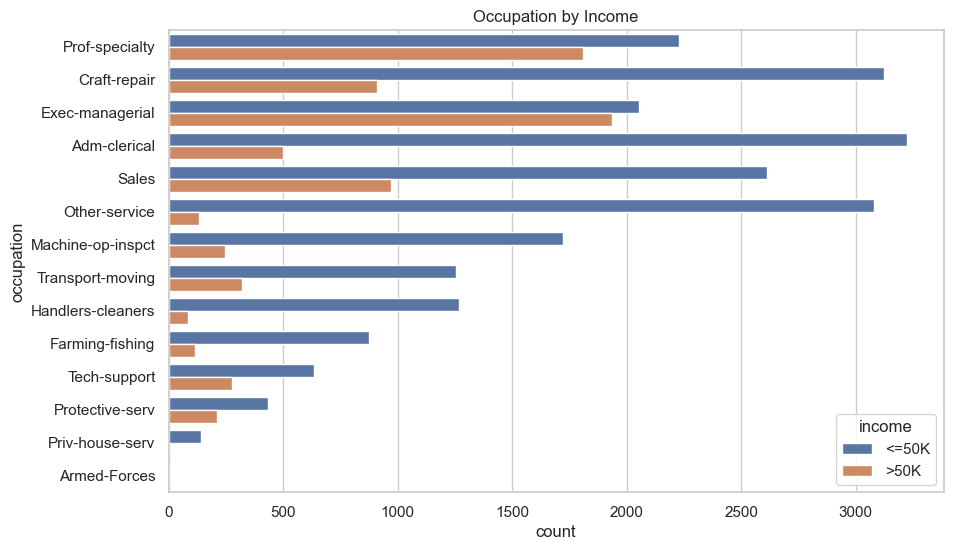

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='occupation', hue='income', order=df['occupation'].value_counts().index)
plt.title('Occupation by Income')
plt.show()

## 7. Gender vs Income

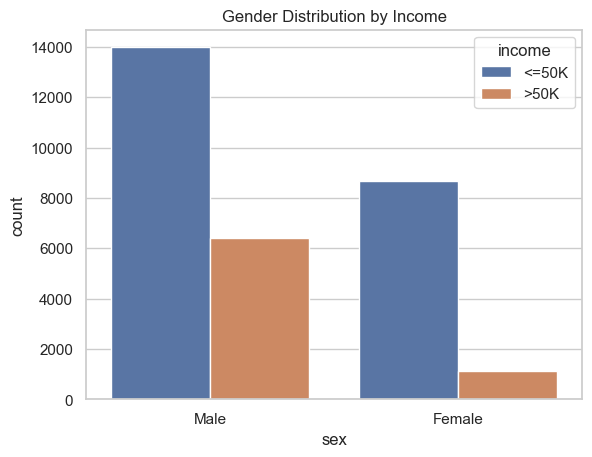

In [16]:
sns.countplot(data=df, x='sex', hue='income')
plt.title('Gender Distribution by Income')
plt.show()

## 8. Marital Status vs Income

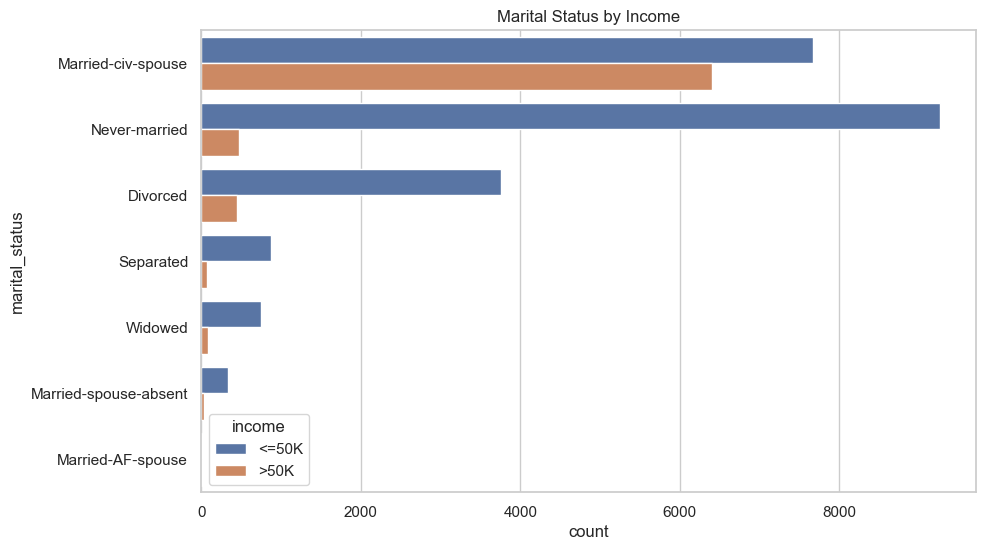

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, y='marital_status', hue='income', order=df['marital_status'].value_counts().index)
plt.title('Marital Status by Income')
plt.show()

## 9. Hours per Week vs Income
A violin plot is used here instead of a box plot because the data is heavily clustered around the 40-hour mark, with extreme outliers stretching far beyond. While a box plot summarizes the central tendency and spread, it doesn’t effectively capture the full shape of the distribution. The violin plot, on the other hand, provides a clearer picture of the data’s density and skewness, making it more suitable for visualizing work hours across income groups.

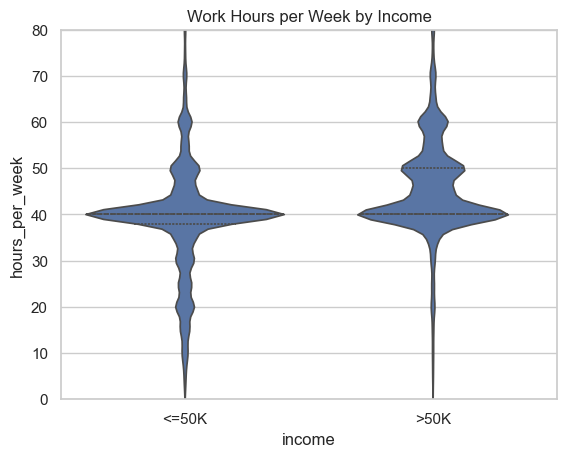

In [18]:
sns.violinplot(data=df, x='income', y='hours_per_week', inner='quartile')
plt.ylim(0, 80)
plt.title('Work Hours per Week by Income')
plt.show()


## 10. Correlation Heatmap
We use a correlation heatmap to visualize the relationships between numerical features, including the newly added income_numeric variable. This allows us to assess how strongly each feature is linearly correlated with income, helping us identify which variables may be most predictive. It also highlights any redundant data. The coolwarm color palette is used for clarity: deeper reds represent stronger positive correlations, while darker blues indicate stronger negative correlations, making it easy to spot meaningful relationships at a glance.

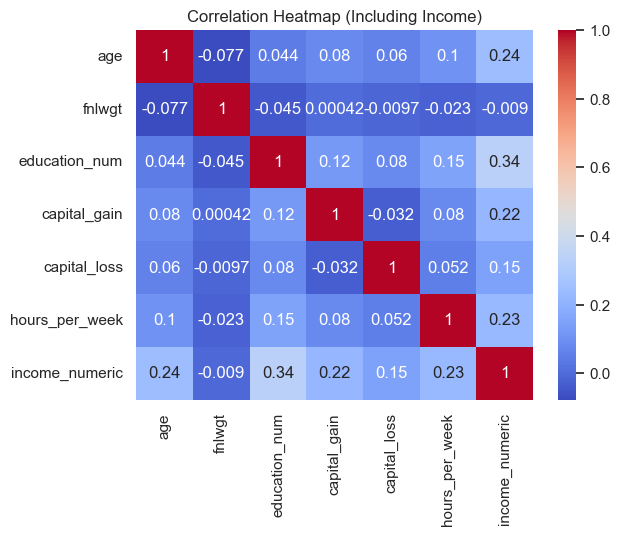

"numerical_cols = df.select_dtypes(include='number')\ncorr = numerical_cols.corr()\nsns.heatmap(corr, annot=True, cmap='coolwarm')\nplt.title('Correlation Heatmap')\nplt.show()"

In [19]:
df['income_numeric'] = df['income'].apply(lambda x: 1 if x == '>50K' else 0)
numerical_cols = df.select_dtypes(include='number')
corr = numerical_cols.corr()

sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap (Including Income)')
plt.show()

"""numerical_cols = df.select_dtypes(include='number')
corr = numerical_cols.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()"""